## Data Exploration and Cleaning of project

### Project Work flow

* Problem Statement
* Data Collection
* EDA
* Preprocessing 
* Emotion Detection 
* Music Recommendation Logic
* Model evaluation

#### 1) Problem Statement

* This is an emotion-aware music recommendation system that classifies and recommends songs not only based on their musical and lyrical features, but also by incorporating the emotional context behind them. 

* The main goal of this project is to enhance the effectiveness of music recommendations by categorizing songs into four core emotions — such as `happy`, `sad`, `angry`, and `relaxed` — and leveraging similarities in audio features within these emotion groups.

* By integrating emotional weighting into the recommendation logic, it is aims to provide more personalized and mood-relevant suggestions to users, helping them discover songs that resonate with their current feelings or desired emotional state.

#### 2) Data Collection

* This dataset has been downloaded from `278k Emotion labeled spotify songs`
* Dataset Link - https://www.kaggle.com/datasets/abdullahorzan/moodify-dataset?resource=download&select=278k_song_labelled.csv

In [12]:
### Importing required packages
import numpy as np
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
file_id = "1Hg3ENUzwsb3rLSFqEW9zcHPB98VVApXi"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "raw_data.csv", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1Hg3ENUzwsb3rLSFqEW9zcHPB98VVApXi
From (redirected): https://drive.google.com/uc?id=1Hg3ENUzwsb3rLSFqEW9zcHPB98VVApXi&confirm=t&uuid=51af724e-9917-4019-bad7-0faeba2b0a16
To: c:\Users\Admin\OneDrive\Desktop\music_recommendation_system_based_on_emotion\notebook\raw_data.csv
100%|██████████| 1.15G/1.15G [02:17<00:00, 8.36MB/s]


'raw_data.csv'

In [15]:
data = pd.read_csv('raw_data.csv')

In [16]:
data.head()

,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Good for Morning Routine,Similar Artist 1,Similar Song 1,Similarity Score 1,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3
0,!!!,Even When the Waters Cold,Friends told her she was better off at the bot...,03:47,sadness,hip hop,Thr!!!er,29th April 2013,D min,105,...,0,Corey Smith,If I Could Do It Again,0.986061,Toby Keith,Drinks After Work,0.983719,Space,Neighbourhood,0.983236
1,!!!,One Girl / One Boy,"Well I heard it, playing soft From a drunken b...",04:03,sadness,hip hop,Thr!!!er,29th April 2013,A# min,117,...,0,Hiroyuki Sawano,BRE@TH//LESS,0.995409,When In Rome,Heaven Knows,0.990905,Justice Crew,Everybody,0.984483
2,!!!,Pardon My Freedom,"Oh my god, did I just say that out loud? Shoul...",05:51,joy,hip hop,Louden Up Now,8th June 2004,A Maj,121,...,0,Ricky Dillard,More Abundantly Medley Live,0.993176,Juliet,Avalon,0.965147,The Jacksons,Lovely One,0.956752
3,!!!,Ooo,[Verse 1] Remember when I called you on the te...,03:44,joy,hip hop,As If,16th October 2015,A min,122,...,0,Eric Clapton,Man Overboard,0.992749,Roxette,Don't Believe In Accidents,0.991494,Tiwa Savage,My Darlin,0.990381
4,!!!,Freedom 15,[Verse 1] Calling me like I got something to s...,06:00,joy,hip hop,As If,16th October 2015,F min,123,...,0,Cibo Matto,Lint Of Love,0.981610,Barrington Levy,Better Than Gold,0.981524,Freestyle,Its Automatic,0.981415


### 3) Exploratory Data Analysis

In [17]:
data.columns

Index(['Artist(s)', 'song', 'text', 'Length', 'emotion', 'Genre', 'Album',
       'Release Date', 'Key', 'Tempo', 'Loudness (db)', 'Time signature',
       'Explicit', 'Popularity', 'Energy', 'Danceability', 'Positiveness',
       'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness',
       'Good for Party', 'Good for Work/Study',
       'Good for Relaxation/Meditation', 'Good for Exercise',
       'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving',
       'Good for Social Gatherings', 'Good for Morning Routine',
       'Similar Artist 1', 'Similar Song 1', 'Similarity Score 1',
       'Similar Artist 2', 'Similar Song 2', 'Similarity Score 2',
       'Similar Artist 3', 'Similar Song 3', 'Similarity Score 3'],
      dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551443 entries, 0 to 551442
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Artist(s)                       551443 non-null  object 
 1   song                            551427 non-null  object 
 2   text                            551443 non-null  object 
 3   Length                          551443 non-null  object 
 4   emotion                         551443 non-null  object 
 5   Genre                           551443 non-null  object 
 6   Album                           551391 non-null  object 
 7   Release Date                    551443 non-null  object 
 8   Key                             551443 non-null  object 
 9   Tempo                           551443 non-null  int64  
 10  Loudness (db)                   551443 non-null  object 
 11  Time signature                  551435 non-null  object 
 12  Explicit        

In [19]:
data.shape

(551443, 39)

#### Insights

* This dataset contain nearly 5,50,000 rows with 39 columns. 
* It has totally 18 categorical columns, 18 integer columns and 3 float columns.

### Checking for null values

In [20]:
data.isnull().sum()

Artist(s)                          0
song                              16
text                               0
Length                             0
emotion                            0
Genre                              0
Album                             52
Release Date                       0
Key                                0
Tempo                              0
Loudness (db)                      0
Time signature                     8
Explicit                           0
Popularity                         0
Energy                             0
Danceability                       0
Positiveness                       0
Speechiness                        0
Liveness                           0
Acousticness                       0
Instrumentalness                   0
Good for Party                     0
Good for Work/Study                0
Good for Relaxation/Meditation     0
Good for Exercise                  0
Good for Running                   0
Good for Yoga/Stretching           0
G

#### Insights

* The dataset contains some missing values. Since it's quite large, I chose to remove the rows with null values instead of filling them with placeholder values, to maintain data quality.

In [21]:
data.dropna(inplace=True)

In [22]:
data.shape

(551324, 39)

### Checking for duplicated values

In [23]:
data.duplicated().sum()

np.int64(53382)

In [24]:
data = data.drop_duplicates().reset_index(drop = True)

In [25]:
data.shape

(497942, 39)

In [26]:
data.drop(['Length', 'Album', 'Release Date', 'Key', 'Time signature', 'Explicit', 'Popularity'], axis = 1, inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497942 entries, 0 to 497941
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Artist(s)                       497942 non-null  object 
 1   song                            497942 non-null  object 
 2   text                            497942 non-null  object 
 3   emotion                         497942 non-null  object 
 4   Genre                           497942 non-null  object 
 5   Tempo                           497942 non-null  int64  
 6   Loudness (db)                   497942 non-null  object 
 7   Energy                          497942 non-null  int64  
 8   Danceability                    497942 non-null  int64  
 9   Positiveness                    497942 non-null  int64  
 10  Speechiness                     497942 non-null  int64  
 11  Liveness                        497942 non-null  int64  
 12  Acousticness    

<Axes: xlabel='emotion'>

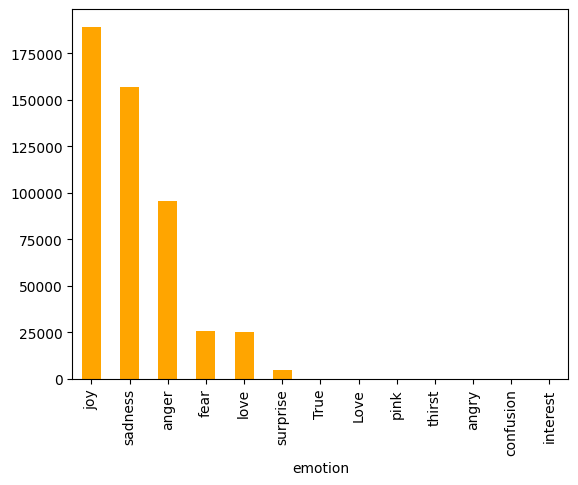

In [28]:
data['emotion'].value_counts().plot(kind='bar', color='orange')

In [29]:
data['emotion'].value_counts()['True']

np.int64(17)

In [30]:
data['emotion'].value_counts()['Love']

np.int64(2)

In [31]:
data['emotion'].value_counts()['angry']

np.int64(1)

In [32]:
data['emotion'].unique()

array(['sadness', 'joy', 'love', 'surprise', 'anger', 'fear', 'angry',
       'True', 'thirst', 'confusion', 'pink', 'interest', 'Love'],
      dtype=object)

#### Insights 

* Labels like `True`, `thirst`, `interest`, `confusion`, `angry`, `Love` and `pink` are very less compared to other. So i just want to remove them for better data quality.

In [33]:
data = data[~data['emotion'].isin(['True', 'thirst', 'pink', 'interest', 'angry','Love','confusion'])]

In [34]:
data.shape

(497917, 32)

In [35]:
artist_count = data['Artist(s)'].value_counts()
artist_count

Artist(s)
L.A.B.                                     1428
TEMM DOGG                                   701
Kora                                        670
Shapeshifter                                641
Home Brew                                   606
                                           ... 
落日飛車 Sunset Rollercoaster,Michael Seyer       1
藤田淳平                                          1
血の女王（CV. 田中理恵）                                1
遠藤正明                                          1
코케                                            1
Name: count, Length: 127306, dtype: int64

In [36]:
popular_artist = artist_count[artist_count >= 50].index
data = data[data['Artist(s)'].isin(popular_artist)].reset_index(drop=True)

In [37]:
data.shape

(171535, 32)

In [38]:
data['Artist(s)'].value_counts()

Artist(s)
L.A.B.                      1428
TEMM DOGG                    701
Kora                         670
Shapeshifter                 641
Home Brew                    606
                            ... 
Unknown Mortal Orchestra      50
Flight of the Conchords       50
Yeat                          50
Mudvayne                      50
6 Dogs                        50
Name: count, Length: 1578, dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171535 entries, 0 to 171534
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Artist(s)                       171535 non-null  object 
 1   song                            171535 non-null  object 
 2   text                            171535 non-null  object 
 3   emotion                         171535 non-null  object 
 4   Genre                           171535 non-null  object 
 5   Tempo                           171535 non-null  int64  
 6   Loudness (db)                   171535 non-null  object 
 7   Energy                          171535 non-null  int64  
 8   Danceability                    171535 non-null  int64  
 9   Positiveness                    171535 non-null  int64  
 10  Speechiness                     171535 non-null  int64  
 11  Liveness                        171535 non-null  int64  
 12  Acousticness    

#### Insights

***Filtering Artists by Frequency***

* To reduce noise and focus on more relevant data, we remove artists that appear fewer than 50 times in the dataset. 

* Before filtering: 127,308 unique artists

* After filtering: 1578 unique artists
* This step ensures that the model trains on artists with enough representation, leading to more reliable recommendations.

<Axes: xlabel='emotion'>

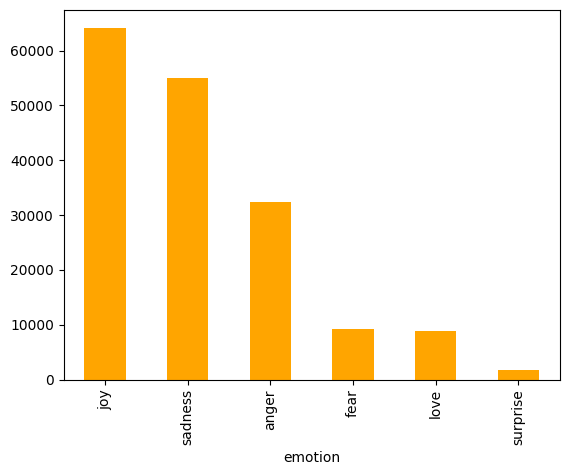

In [40]:
data['emotion'].value_counts().plot(kind='bar', color='orange')

In [41]:
data.Genre.value_counts()

Genre
hip hop                          17582
pop                               3417
country                           3377
rock,pop,alternative rock         3026
rap,hip hop,trap                  2845
                                 ...  
jazz,hip-hop                        50
classical,alternative rock          50
electropop,synthpop,indie pop       50
progressive metal,nu metal          50
folk,alternative rock,rock          50
Name: count, Length: 712, dtype: int64

In [42]:
data.columns

Index(['Artist(s)', 'song', 'text', 'emotion', 'Genre', 'Tempo',
       'Loudness (db)', 'Energy', 'Danceability', 'Positiveness',
       'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness',
       'Good for Party', 'Good for Work/Study',
       'Good for Relaxation/Meditation', 'Good for Exercise',
       'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving',
       'Good for Social Gatherings', 'Good for Morning Routine',
       'Similar Artist 1', 'Similar Song 1', 'Similarity Score 1',
       'Similar Artist 2', 'Similar Song 2', 'Similarity Score 2',
       'Similar Artist 3', 'Similar Song 3', 'Similarity Score 3'],
      dtype='object')

#### Audio Feature Distributions

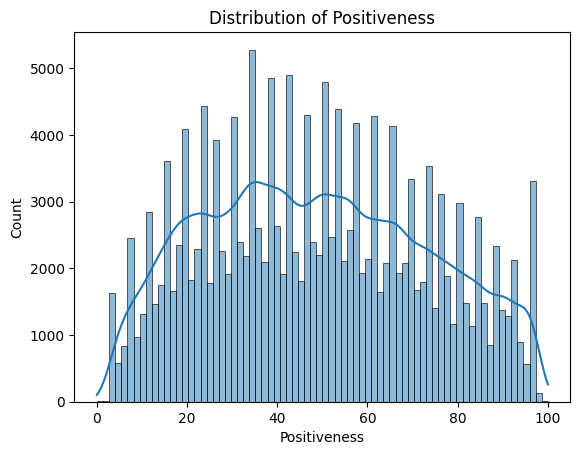

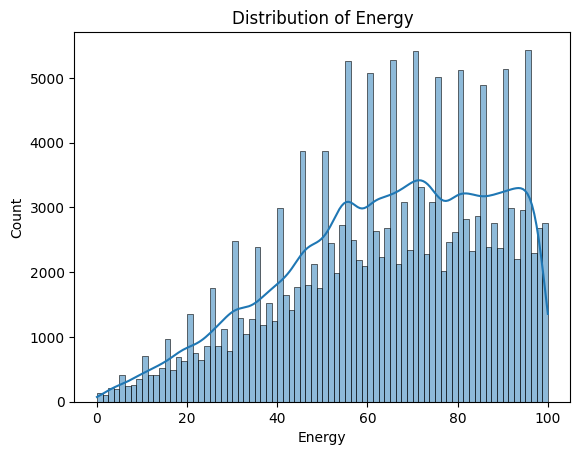

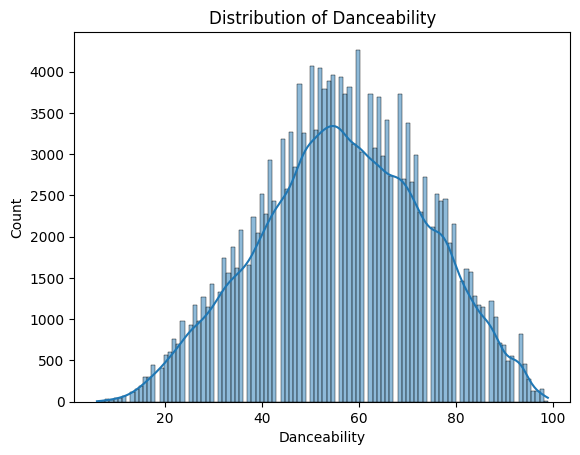

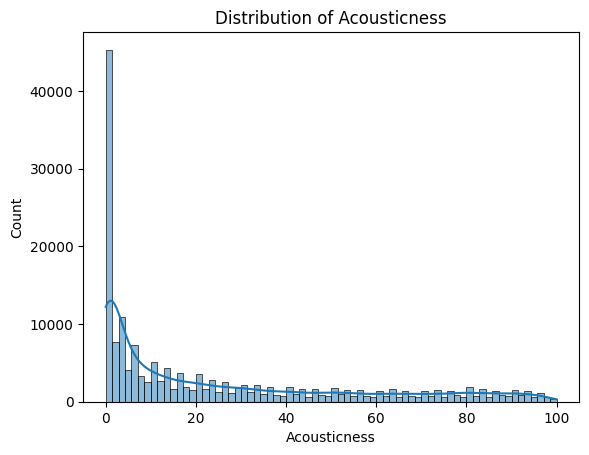

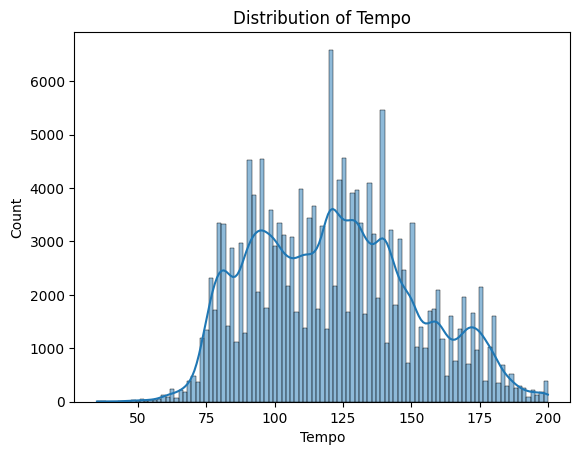

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

audio_features = ['Positiveness', 'Energy', 'Danceability', 'Acousticness', 'Tempo']
for feature in audio_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

#### Insights

* `Energy`: Most songs have moderate to high energy (40-100 range), showing a strong presence of upbeat tracks and biased toward energetic songs. Useful for identifying emotions like joy, anger and motivation.
* `Acousticness`: Sharp peak near 0, meaning most songs are highly electronic and Helpful in classifying calm emotions like love, sadness, or relaxation.
* `Positiveness`: Distributed fairly evenly but slightly skewed toward mid range(30-70). Indicates a mix of both happy and sad songs.
* `Danceability`: Normally distributed peaking around 50-60 very few songs are undanceable and few songs are extremely danceable.
* `Tempo`: Most songs lie between 80-150 with a peak near 120. have some outliers at very low or very high tempos. it can influence mood recognitio like faster means energetic, slower means emotional.

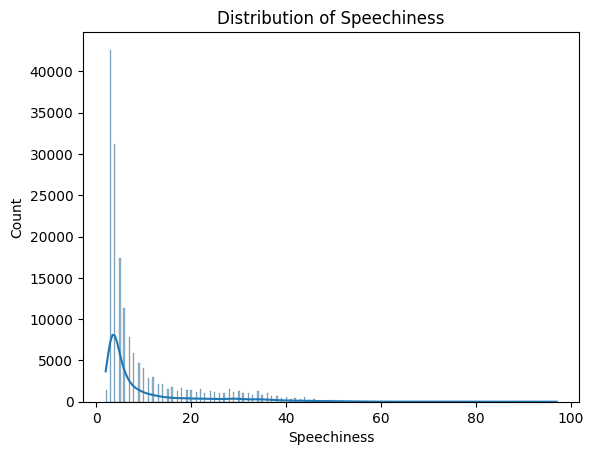

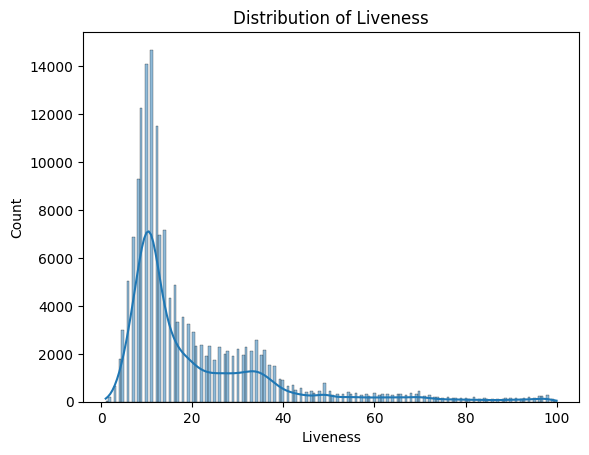

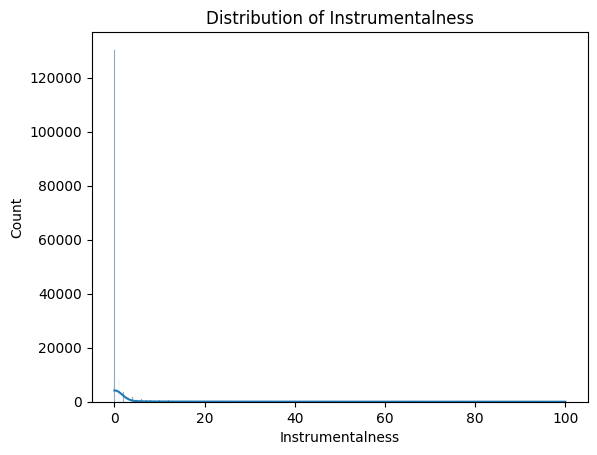

In [44]:
audio_features = ['Speechiness', 'Liveness', 'Instrumentalness']
for feature in audio_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

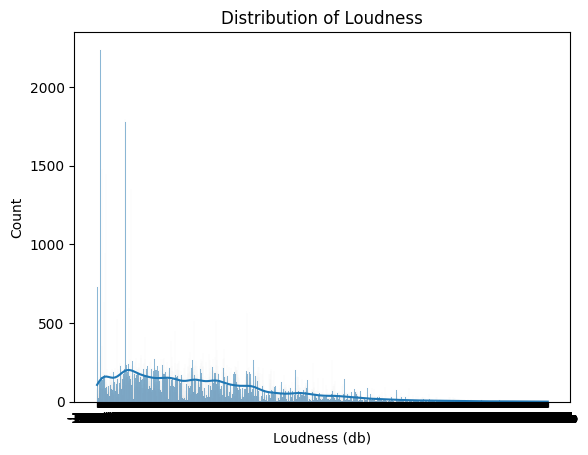

In [45]:
sns.histplot(data['Loudness (db)'], kde=True)
plt.title('Distribution of Loudness')
plt.show()

In [46]:
data.columns

Index(['Artist(s)', 'song', 'text', 'emotion', 'Genre', 'Tempo',
       'Loudness (db)', 'Energy', 'Danceability', 'Positiveness',
       'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness',
       'Good for Party', 'Good for Work/Study',
       'Good for Relaxation/Meditation', 'Good for Exercise',
       'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving',
       'Good for Social Gatherings', 'Good for Morning Routine',
       'Similar Artist 1', 'Similar Song 1', 'Similarity Score 1',
       'Similar Artist 2', 'Similar Song 2', 'Similarity Score 2',
       'Similar Artist 3', 'Similar Song 3', 'Similarity Score 3'],
      dtype='object')

#### Insights

* `Speechiness` is heavily right skewed, peaking at very low values, meaning most songs have little to no speech.
* `Liveness` is somewhat normally distributed with a peak around 10-15 low stage presence detection.
* `Instrumentalness` is almost zero for most tracks, highly right skewed. Most songs aren't instrumental.

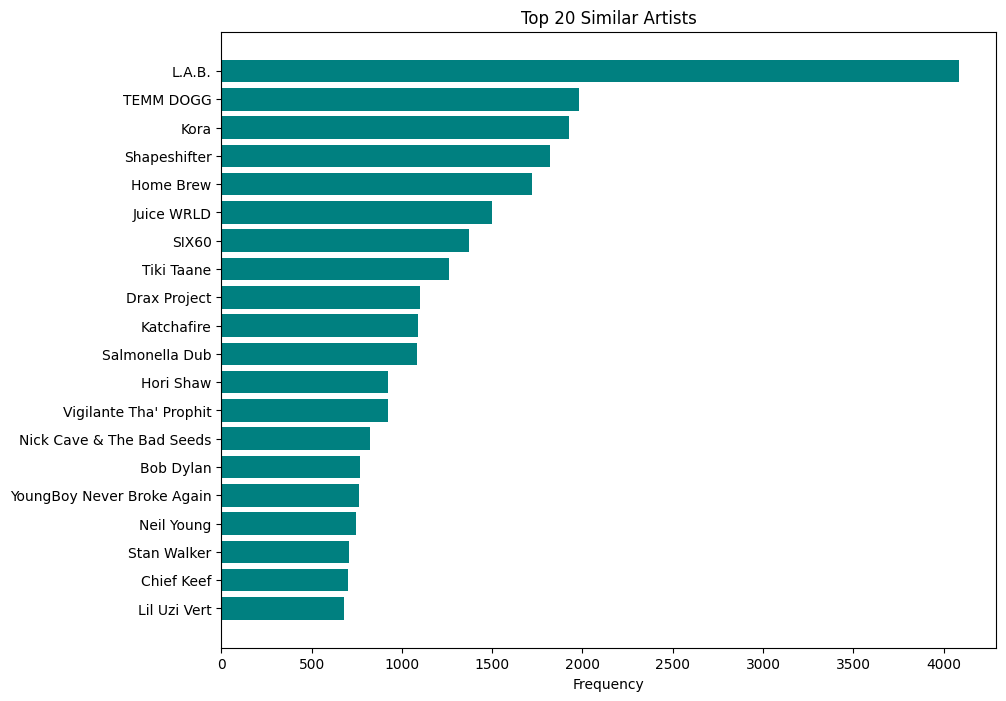

In [47]:
from collections import Counter


all_similar_artists = (
    data['Similar Artist 1'].tolist() + data['Similar Artist 2'].tolist() + data['Similar Artist 3'].tolist()
    )

artist_counts = Counter(all_similar_artists)
top_artists = dict(artist_counts.most_common(20))  

# Plot
plt.figure(figsize=(10, 8))
plt.barh(list(top_artists.keys()), list(top_artists.values()), color='teal')
plt.xlabel("Frequency")
plt.title("Top 20 Similar Artists")
plt.gca().invert_yaxis()
plt.show()

#### Relation Between Emotion and Audio

<Axes: xlabel='emotion', ylabel='Positiveness'>

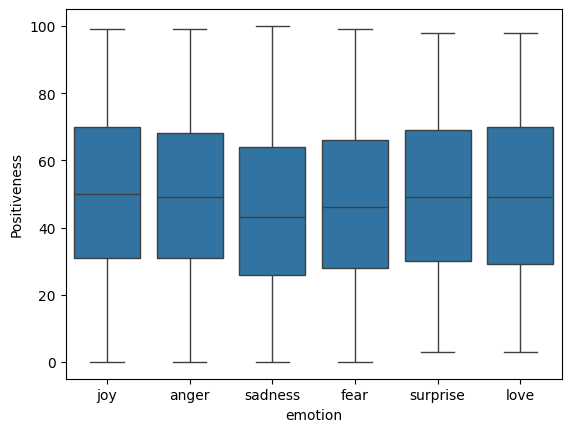

In [48]:
#### Relation between emotion and valence
sns.boxplot(x='emotion', y='Positiveness', data=data)

<Axes: xlabel='emotion', ylabel='Energy'>

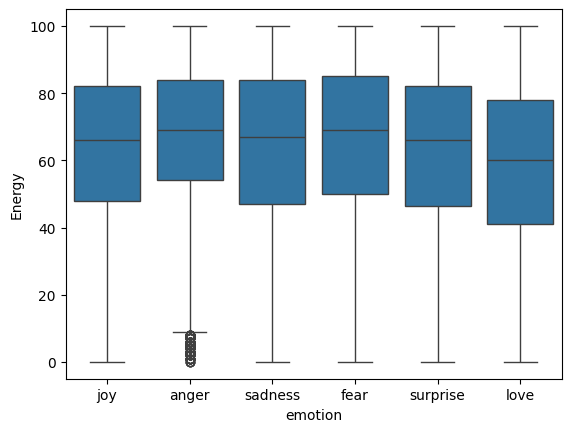

In [49]:
#### Relation between emotion and energy
sns.boxplot(x='emotion', y='Energy', data=data)

<Axes: xlabel='emotion', ylabel='Danceability'>

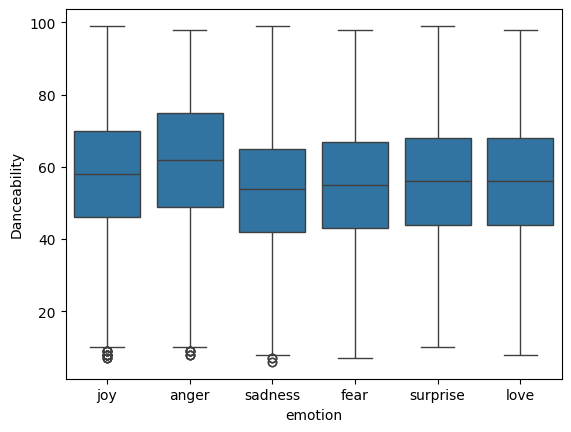

In [50]:
#### Relation between emotion and danceability
sns.boxplot(x='emotion', y='Danceability', data=data)

<Axes: xlabel='emotion', ylabel='Tempo'>

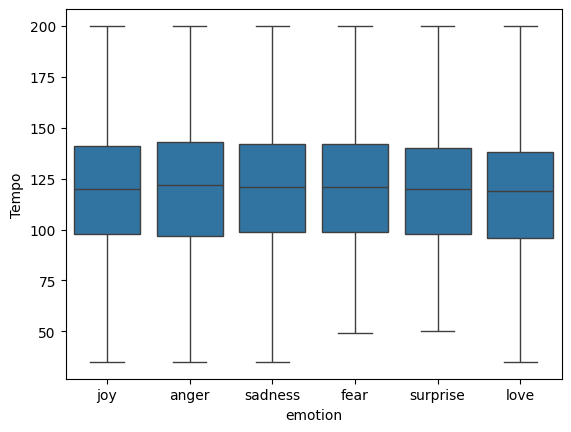

In [51]:
#### Relation between emotion and tempo
sns.boxplot(x='emotion', y='Tempo', data=data)

<Axes: xlabel='emotion', ylabel='Acousticness'>

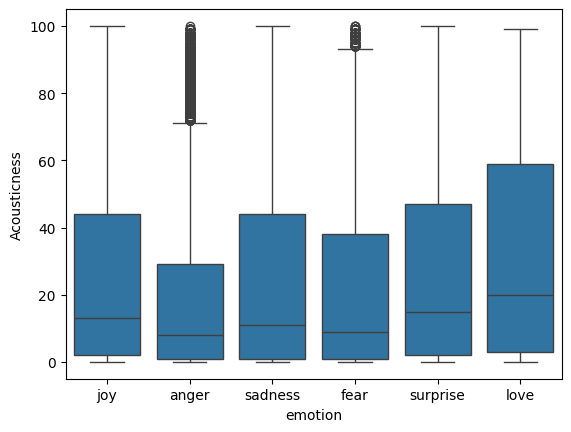

In [52]:
#### Relation between emotion and acousticness
sns.boxplot(x='emotion', y='Acousticness', data=data)

#### Insights 

* `Positiveness VS Emotion`: All emotions have a similar spread in positiveness (0-100), joy and love show a slightly higher median positiveness. sadness and fear have slightly lower medians.
* `Energy VS Emotion`: Anger, Fear and Sadness show high energy levels and Anger has many outliers on the lower end, indicating some angry tracks that are low in energy. Love and Joy have slightly lower medians but still high.
* `Danceability VS Emotion`: All emotions show similar medians and distributions. Anger has a higher median and slightly narrower IQR implying consistent danceability in angry tracks. Sadness shows more variability with some lower outliers.
* `Tempo VS Emotion`: Tempo distribution is very similar across all emotions and medians around 120-130.
* `Acousticness VS Emotion`: Love, Sadness and Joy have higher acousticness, Anger and Fear show low median acousticness with lots of low outliers, Anger and Fear also have many outliers.

#### Correlation Heatmap

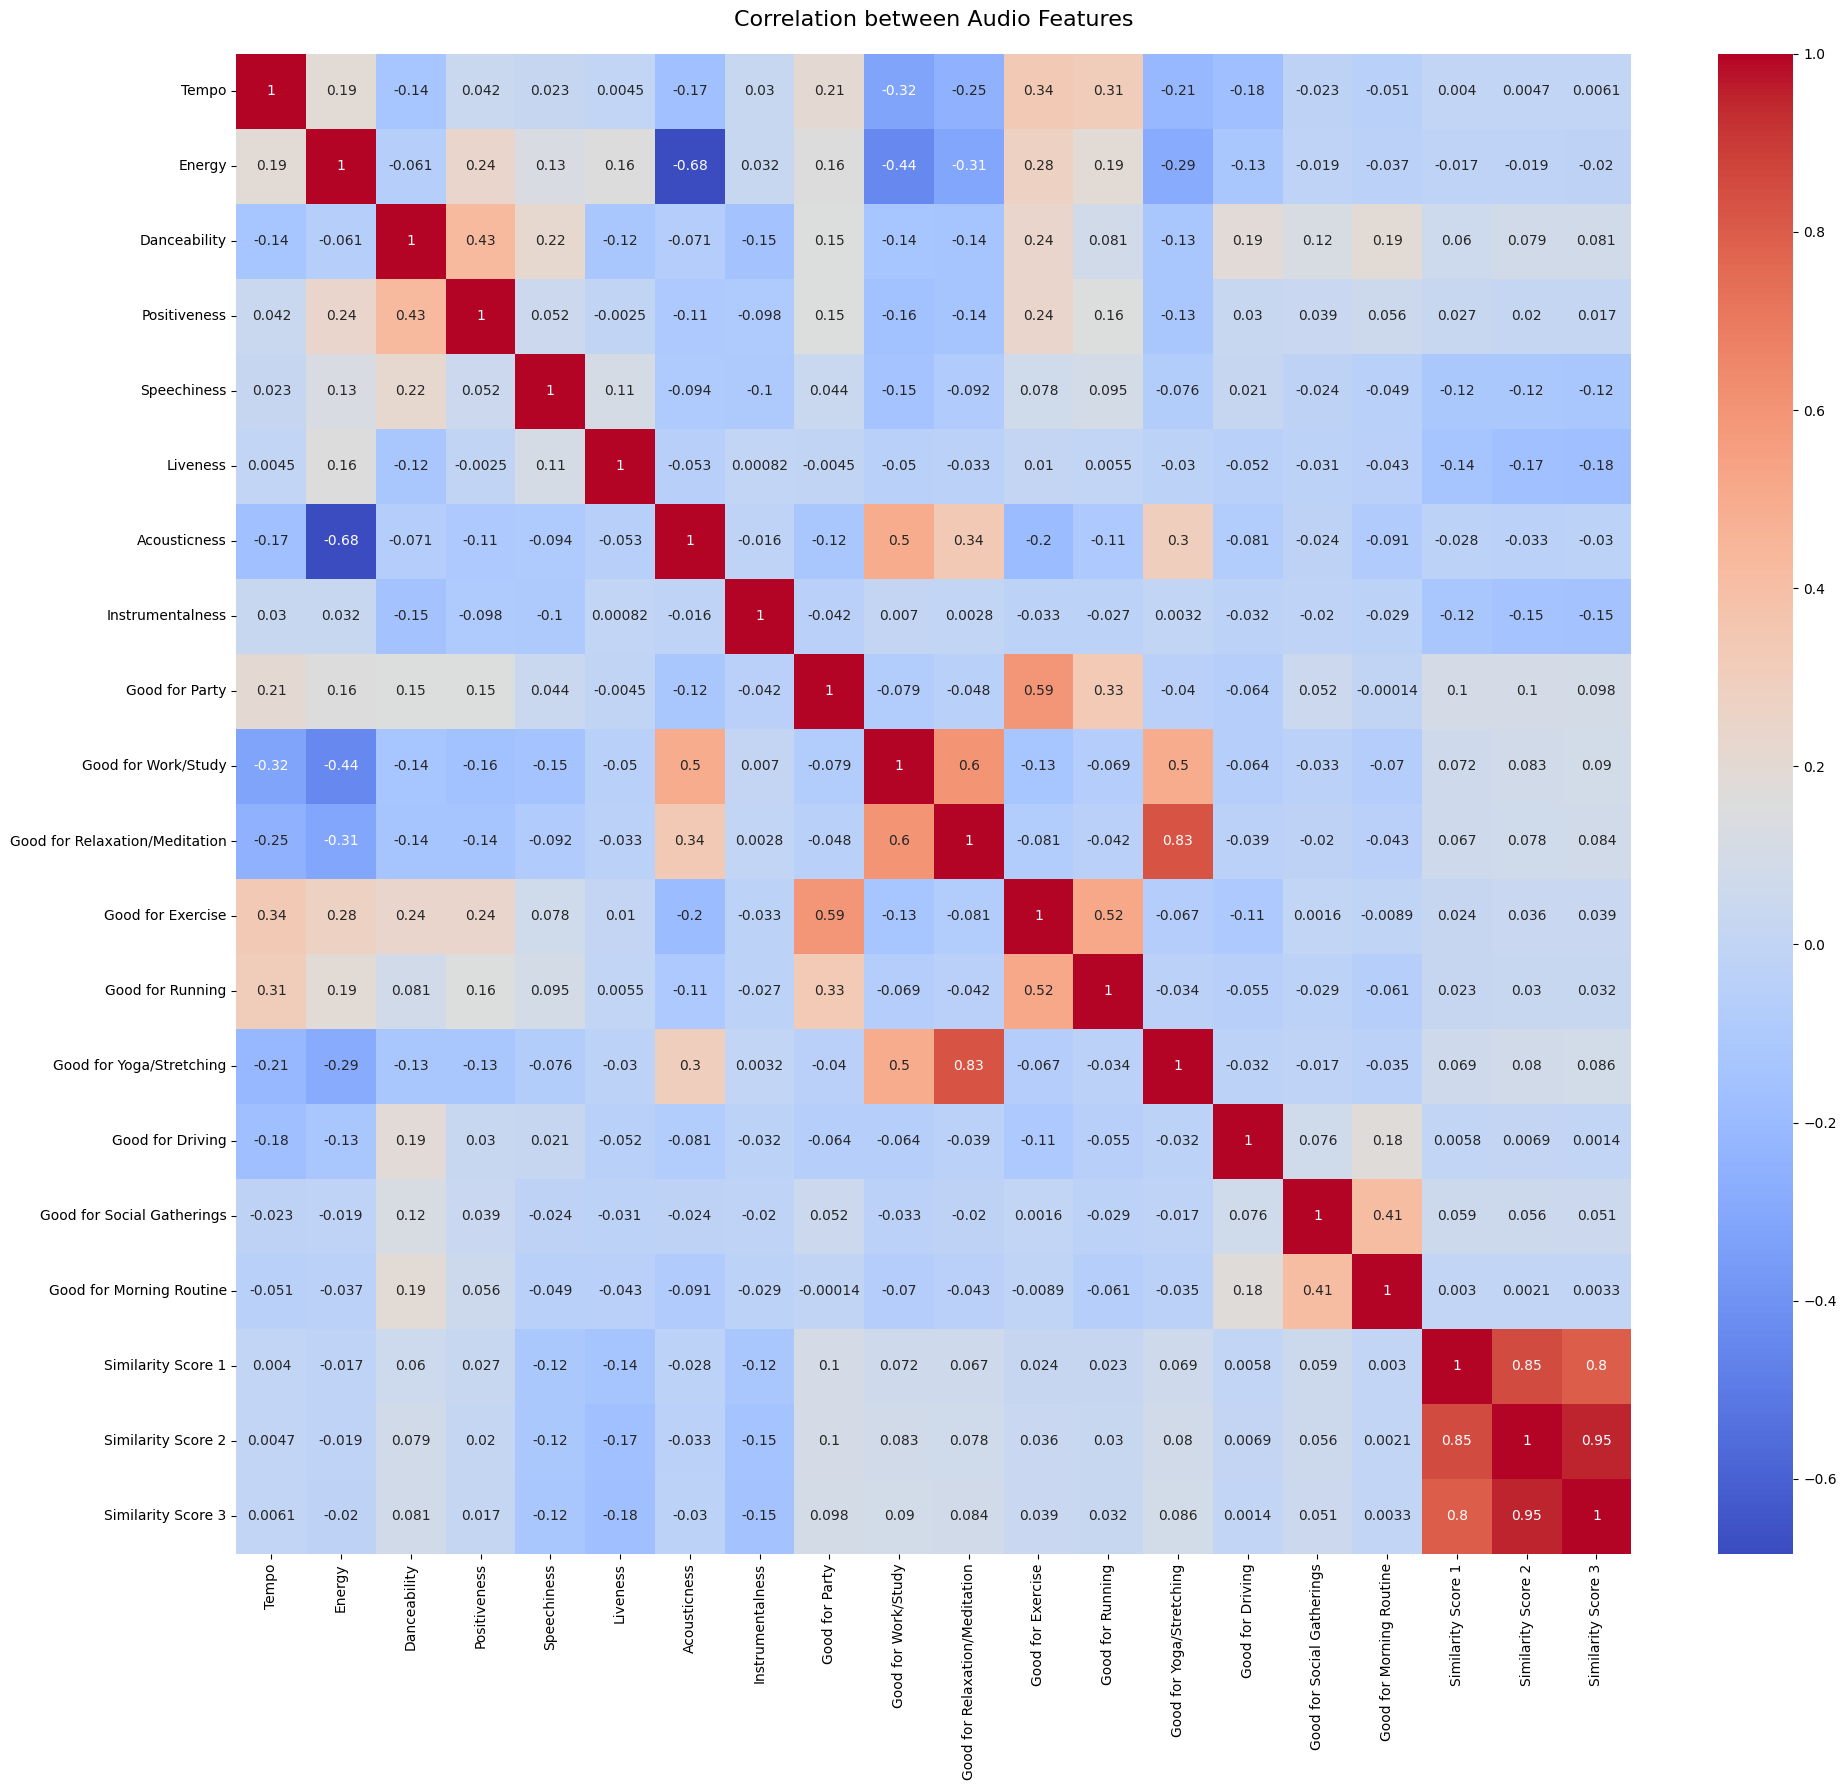

In [53]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')

plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=10)   # Rotate y-axis labels
plt.title("Correlation between Audio Features", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

#### Insights

**`Strong Positive Correlations`** 
* Energy and Danceability (0.62) Enegetic songs tend to be more danceable.
* Positiveness and Danceability (0.41) Happier songs are also more danceable.
* Good for party correlates highly with Energy(0.58), Danceability(0.50), Positiveness(0.52).
* Good for Exercise Highly correlation with Energy(0.62) and also with Danceability(0.49).

**`Strong Negative correlations`**
* Acousticness has negative correlations with Energy(-0.61), Danceability(-0.18), Good for Excercise(-0.38), Good for Party(-0.41), Good for Running(-0.35).
* Acoustic songs tend to be calm, less energetic, and not suitable for workouts or parties.
* Good for Relaxation/Meditation is Negative correlation with energy(-0.48) and Tempo(-0.25) but Positively correlative with Acousticness(0.43) Because Meditation tracks are slow, calm and acoustic-heavy.

#### UX Tags Analysis

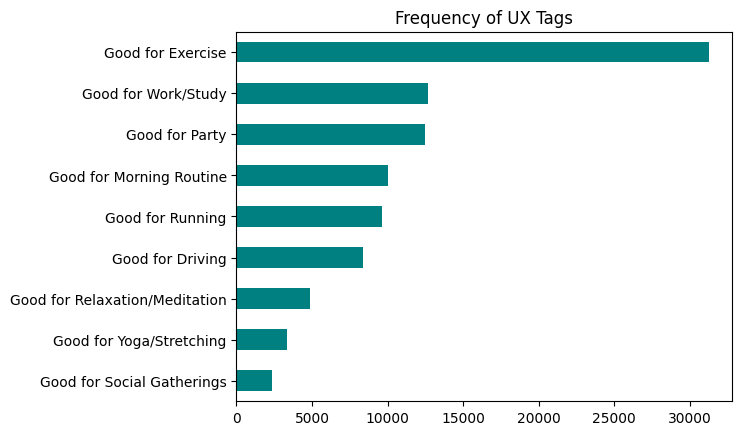

In [54]:
ux_cols = [col for col in data.columns if 'Good for' in col]
data[ux_cols].sum().sort_values().plot(kind='barh', color='teal')
plt.title("Frequency of UX Tags")
plt.show()

#### Insights

* `Good for Exercise`: Most frequent tag by a large margin — over 30,000 tracks. This shows a strong bias in the dataset towards high-energy, motivational music.
* `Good for Party & Good for Work/Study` has similar volume of data with nearly 12,000 tracks.
* `Good for Morning Routine & Good for Running` have moderate usage nearly 10k and 9k respectively.
* `Good for Driving` Around 8k which is less frequent.

* `Good for Relaxation/Meditation & Good for Yoga/Stretching` are around 5k and 4k nearly. They are typically calm, slow tempo and possibly acoustic tracks.
* So i need to merge these columns for into a new tag like `Relaxation/Yoga` for improving model generalization for calm/emotional music.
* Also want to remove `Good for Social Gatherings` which may introduce noise or imbalance to model.

In [55]:
data['Good for Relaxation/Yoga'] = ((data['Good for Relaxation/Meditation'] == 1) | (data['Good for Yoga/Stretching'] == 1)).astype(int)
data.drop(['Good for Relaxation/Meditation', 'Good for Yoga/Stretching'], axis = 1, inplace=True)

In [56]:
data.drop('Good for Social Gatherings', axis = 1, inplace=True)

### 4) Preprocessing and Cleaning data

In [57]:
### Converting objective type into numerical type
data['Loudness (db)'] = data['Loudness (db)'].str.replace('db','')
data['Loudness (db)'] = pd.to_numeric(data['Loudness (db)'], errors='coerce')

In [58]:
data['Loudness (db)'].dtype

dtype('float64')

In [59]:
## Cleaning Artist(s) column
data['Artist(s)'] = data['Artist(s)'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [60]:
data['Artist(s)']

0         weird al yankovic
1         weird al yankovic
2         weird al yankovic
3         weird al yankovic
4         weird al yankovic
                ...        
171530               zz top
171531               zz top
171532               zz top
171533               zz top
171534               zz top
Name: Artist(s), Length: 171535, dtype: object

In [61]:
#### Cleaning Text column
import re
data['text'] = data['text'].str.lower().apply(lambda x: re.sub(r'[^a-z\s]', '', x))

In [62]:
data.text

0         verse  as i walk through the valley where i ha...
1         intro everybody shut up woo everyone listen up...
2         chorus they see me mowin my front lawn i know ...
3         verse  it might seem crazy wearing stripes wit...
4         verse  seven oclock in the evening watchin som...
                                ...                        
171530    what would you do if you was to love me    wha...
171531    well how much blues do you use    before you u...
171532    im so tired you on my head    whiskeyn mama yo...
171533    when i woke up this morning    i was feeling m...
171534    i hit the street running had an angle in mind ...
Name: text, Length: 171535, dtype: object

In [63]:
data.Genre.unique()

array(['rock,pop,comedy', 'hip hop,trap,cloud rap', 'pop', 'trap',
       'soul,hip hop,pop', 'reggae', 'hip hop,trap', 'hip-hop,hip hop',
       'hard rock,pop rock,rock', 'reggae,alternative rock,rock',
       'pop,pop rock,pop punk', 'rap,hip-hop,hip hop', 'hip hop',
       'rap,hip hop,trap', 'rock,alternative rock,hardcore',
       'rock,pop,hip hop', 'rock,electronic,synthpop',
       'rock,heavy metal,metal', 'gospel', 'electronic,synthpop,pop',
       'rock,synthpop,pop', 'comedy', 'pop,jazz,soul', 'rap,hip hop',
       'punk,punk rock,pop punk', 'alternative rock,rock',
       'pop,classic rock,pop rock', 'rap,hip hop,dancehall',
       'jazz,folk,punk', 'pop,electropop,indie pop',
       'electropop,hip hop,pop', 'rock,country', 'country',
       'rock,pop,alternative rock', 'classical', 'emo,screamo',
       'pop,soul,electropop', 'metal,power metal',
       'rock,heavy metal,new wave', 'rock,alternative rock,heavy metal',
       'pop,alternative rock,jazz', 'folk,country',


In [64]:
#### Cleaning Genre Column
data['Genre'] = data['Genre'].str.lower().str.replace(' ', '').str.replace('-', '')
data['Genre'] = data['Genre'].str.split(',')

# Join list into a space-separated string
data['Genre_str'] = data['Genre'].apply(lambda x: ' '.join(x))

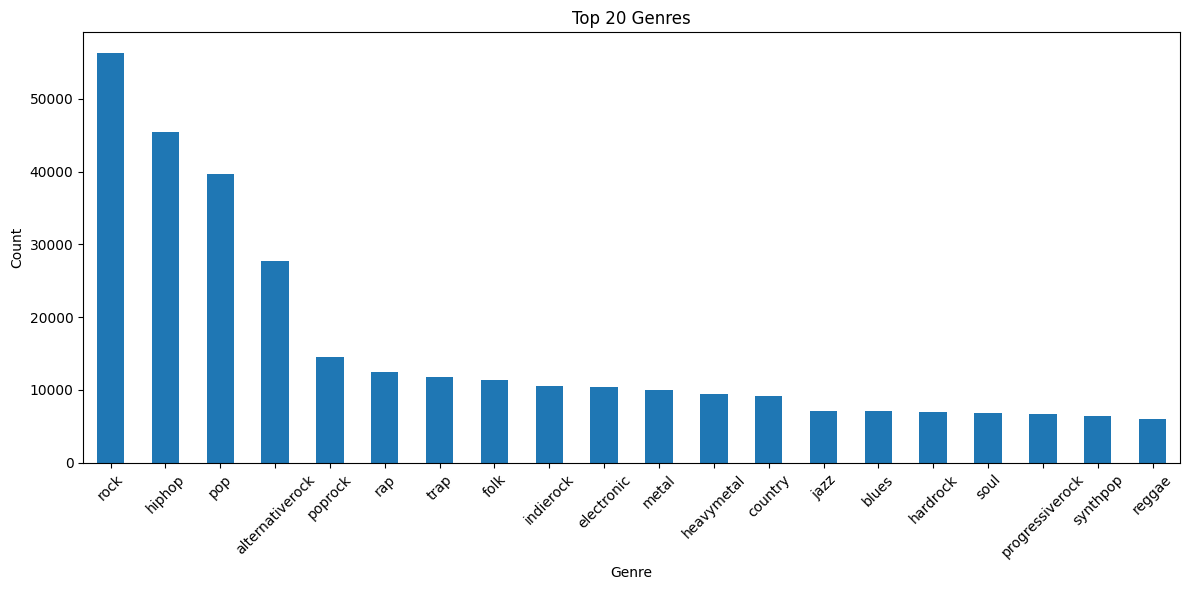

<Axes: ylabel='Genre'>

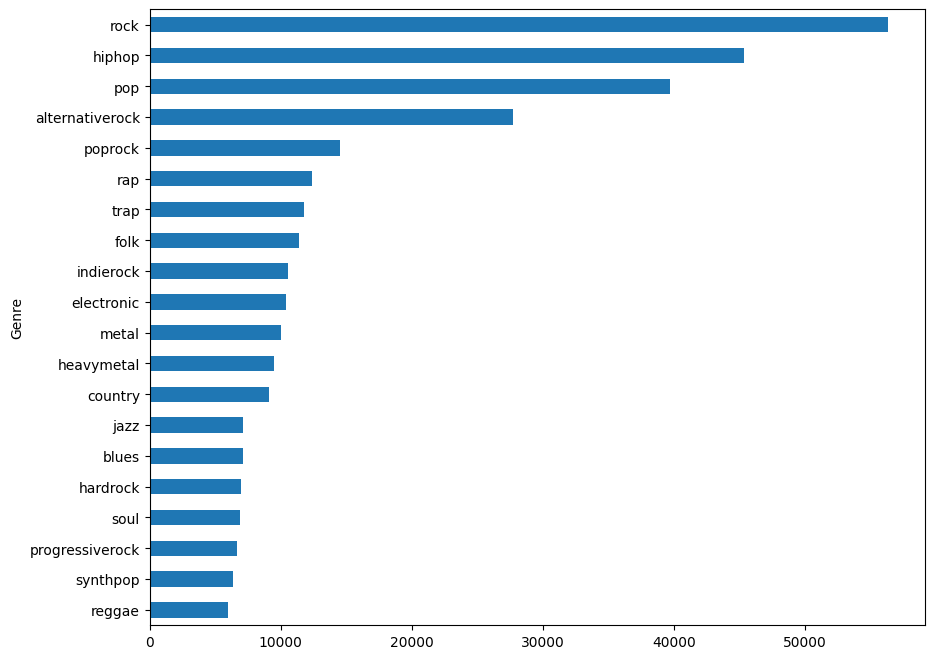

In [65]:
top_genres = data['Genre'].explode().value_counts().nlargest(20)
top_genres.plot(kind='bar', figsize=(12, 6))
plt.title('Top 20 Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_genres.sort_values().plot(kind='barh', figsize=(10, 8))

In [66]:
data.Genre

0            [rock, pop, comedy]
1            [rock, pop, comedy]
2            [rock, pop, comedy]
3            [rock, pop, comedy]
4            [rock, pop, comedy]
                   ...          
171530    [rock, blues, newwave]
171531    [rock, blues, newwave]
171532    [rock, blues, newwave]
171533    [rock, blues, newwave]
171534    [rock, blues, newwave]
Name: Genre, Length: 171535, dtype: object

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171535 entries, 0 to 171534
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Artist(s)                 171535 non-null  object 
 1   song                      171535 non-null  object 
 2   text                      171535 non-null  object 
 3   emotion                   171535 non-null  object 
 4   Genre                     171535 non-null  object 
 5   Tempo                     171535 non-null  int64  
 6   Loudness (db)             171535 non-null  float64
 7   Energy                    171535 non-null  int64  
 8   Danceability              171535 non-null  int64  
 9   Positiveness              171535 non-null  int64  
 10  Speechiness               171535 non-null  int64  
 11  Liveness                  171535 non-null  int64  
 12  Acousticness              171535 non-null  int64  
 13  Instrumentalness          171535 non-null  i

In [68]:
data.to_csv("cleaned_data.csv", index = False)